## The Battle of Neighbourhoods (Bogotá Edition!)
### Final Assignment for Applying to the IBM Data Science Professional Certificate
### Juan Sebastian Mejia Perez

### 1. Introduction

#### 1.1 Background


Bogotá, is the capital district and largest city of Colombia, and so, it is the political, economic, administrative and industrial center of the country. Therefore, it accounts for the highest population (around 7.5 million) and the highest nominal GDP in the country (almost a quarter of the nation's total). 

It accounts for the most business activity, hosts the main financial market, and is the leading destination on education, gastronomy, cultural activity and entertainment, because of its great cultural diversity coming from different regions of the country, and so, its also responsible for 56% of the tourism that arrives to Colombia.

All of this to reflect the fact that the higher population, the higher income, the higher number of universities and nightlife zones, make Bogota the ideal city for making real my business plan.

Although this project is room for a personal business idea, it may be helpful for people who want to open any kind of departing business, since is a primary scope of the different potential locations, gives a clearer idea of some of its selected neighbourhoods and contributes to find the top popular venues around them.


#### 1.2 Business Problem


I have the intend to open a "Home Brewed" Beer Pub in Bogota, but haven't decided the location yet. 
Although I feel familiar with the city since I've lived here all my life and know must of its nightlife zones, aside from asking friends for recommendations on the neighbourhoods or locations where I should open my business, this Capstone Project gave me the tools to explore, segment and cluster neighbourhoods in order to know more about its venues or types of running businesses to complement this hard task.

I have considered that an ideal location should be nearby nightlife zones, since party environments favor beer consumption or next to other beer pubs, since competition favors the attention and asures traffic of focused or niche groups (home brewed beer consumers).



### 2. Data Collection



Bogota is divided into 20 major boroughs, each containing a certain number of planning zones (UPZ) and are composed by dozens of neighbourhoods. 

As previous market research reveals that home brewed beer is not consumed by low-income areas, then not all major boroughs are considered of interest for running the business. Therefore, in this project I will explore some previously selected neighbourhoods in the level of major borough, get the venue data around each and select 2 as the 'potential' locations to open the Beer Pub.

Although I can specify a query for getting any venue related with terms as "nightclub", "bar", "drinks", or so, I decided not to do that since that makes me form an idea of wheteher the kind of businesses on the selected neighbourhood are "familiar" or "residential" rather than a night zone.

#### 2.1 Latitudes and  longitudes



The latitudes and longitudes of the neighbourhoods are required to plot the map and get the venue data.

At this point is worthy to mention that doing my research I found that Bogota doesn't have a source of latitudes and longitudes for each of its neighbourhoods neither on wikipedia or anywhere else, and so, in order to get them I had to search for the coordinates myself, each selected neighbourhood at a time, construct my own data base (I chose to use .csv format), upload it as a cloud storage object on the IBM Cloud Platform and import it as a data asset to my notebook. Therefore, all of the coordinates where searched on and collected individually from wikipedia.

The selected Major Boroughs and Neighbourhoods, with their corresponding coordinates are: 

In [1]:
import pandas as pd
bogota_boroughs = pd.read_csv(r'C:\Users\tianm\Downloads\Geospatial_Coordinates.csv')
bogota_boroughs

Borough     Neighbourhood  Latitude  Longitude
0     CHAPINERO             CHICO  4.681269 -74.046840
1     CHAPINERO    CHAPINERO ALTO  4.645833 -74.063333
2     CHAPINERO   ANTIGUO COUNTRY  4.667285 -74.054726
3     CHAPINERO             MARLY  4.637717 -74.064042
4     CHAPINERO             EMAUS  4.651532 -74.055264
5      ENGATIVA         NORMANDIA  4.669283 -74.104953
6      FONTIBON          FONTIBON  4.678611 -74.141111
7      FONTIBON           MODELIA  4.667180 -74.118589
8       KENNEDY      LAS AMERICAS  4.616046 -74.136947
9      SANTA FE         SAN DIEGO  4.614470 -74.070100
10     SANTA FE       LA MACARENA  4.614087 -74.066306
11         SUBA  COLINA CAMPESTRE  4.741000 -74.084000
12  TEUSAQUILLO       TEUSAQUILLO  4.670556 -74.093056
13  TEUSAQUILLO           PALERMO  4.633051 -74.071060
14  TEUSAQUILLO          GALERIAS  4.641740 -74.075992
15      USAQUEN           USAQUEN  4.695673 -74.030324
16      USAQUEN       PEPE SIERRA  4.697581 -74.046224
17      USAQUEN          CEDRITOS  4.731659 -74.045108
18      USAQUEN  RINCON DEL CHICO  4.675976 -74.047717

#### 2.2 Venue data around each Neighbourhood

Venue data is used to perform clustering on the neighbourhoods. 

In that purpose I will use a Foursquare's API, and provide the corresponding credentials to perform the required calls to get the information of venues within the areas of interest, as it contains a database of millions of places and provides the ability to perform location search and get information about businesses. 

In each neighbourhood, I chose the radius to be 1000 meters and a number of 100 places per neighborhood.

### 3. Methodology

### 3.1 Visualization

First of all, I used Geopy library to get the latitude and longitude values of Bogota, and found that the geograpical coordinates are 4.59808, -74.0760439.

After getting the relevant potential locations for my Home Brewed Beer Pub, I used Python's Folium library to visualize geographic details of Bogota and its selected major districts and I created a map of it with neighbourhoods superimposed on top. I used latitude and longitude values to pinpoint the circle markers, as shown below:

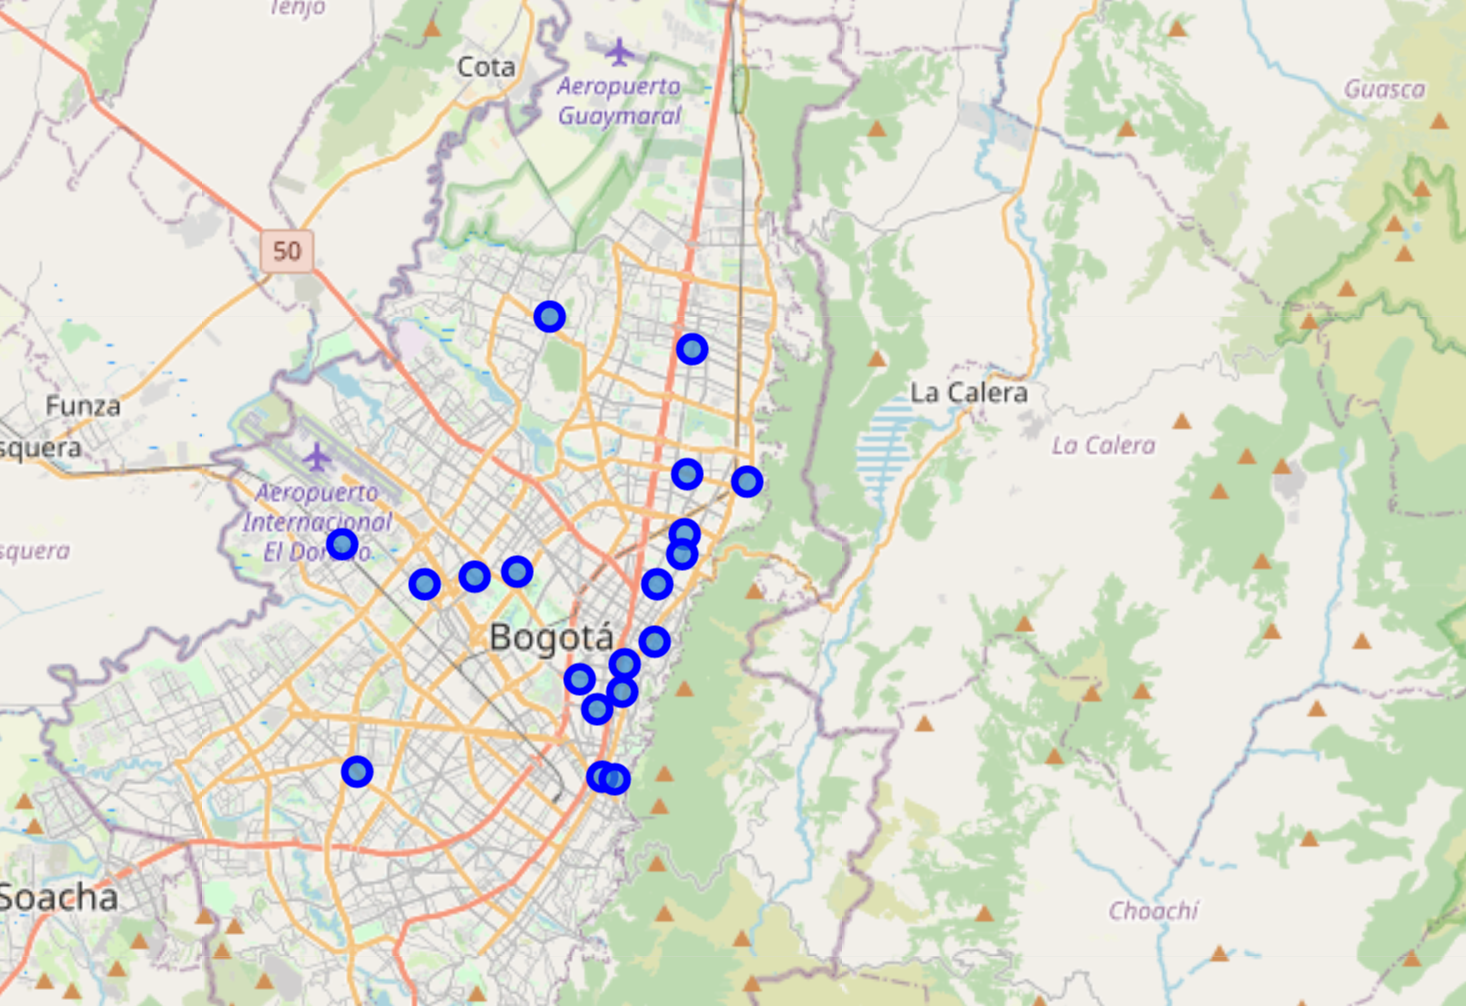

### 3.2 Foursquare API

The next step after getting the relevant coordinates and visualizing them on the map, is to start utilizing the Foursquare API to explore the neighborhoods and segment them. So, after providing the corresponding credentials, I started to explore all neighbourhoods on the data frame starting by Chico.

Within this first neighbourhood on the list, I made a first cll to the API, in order to get in return the top 100 venues that are within a radius of 1000 meters.

In this process there is a need for defining a function that extracts the category of the venue using the **get_category_type** function provided on the previous Hands On Labs and then to clean the json and to structure it into a pandas dataframe. After doing so one can be able to explore all the venues returned by Foursqueare for the neighbourhood Chico. Here's an example preview of the returned dataframe for Chico:


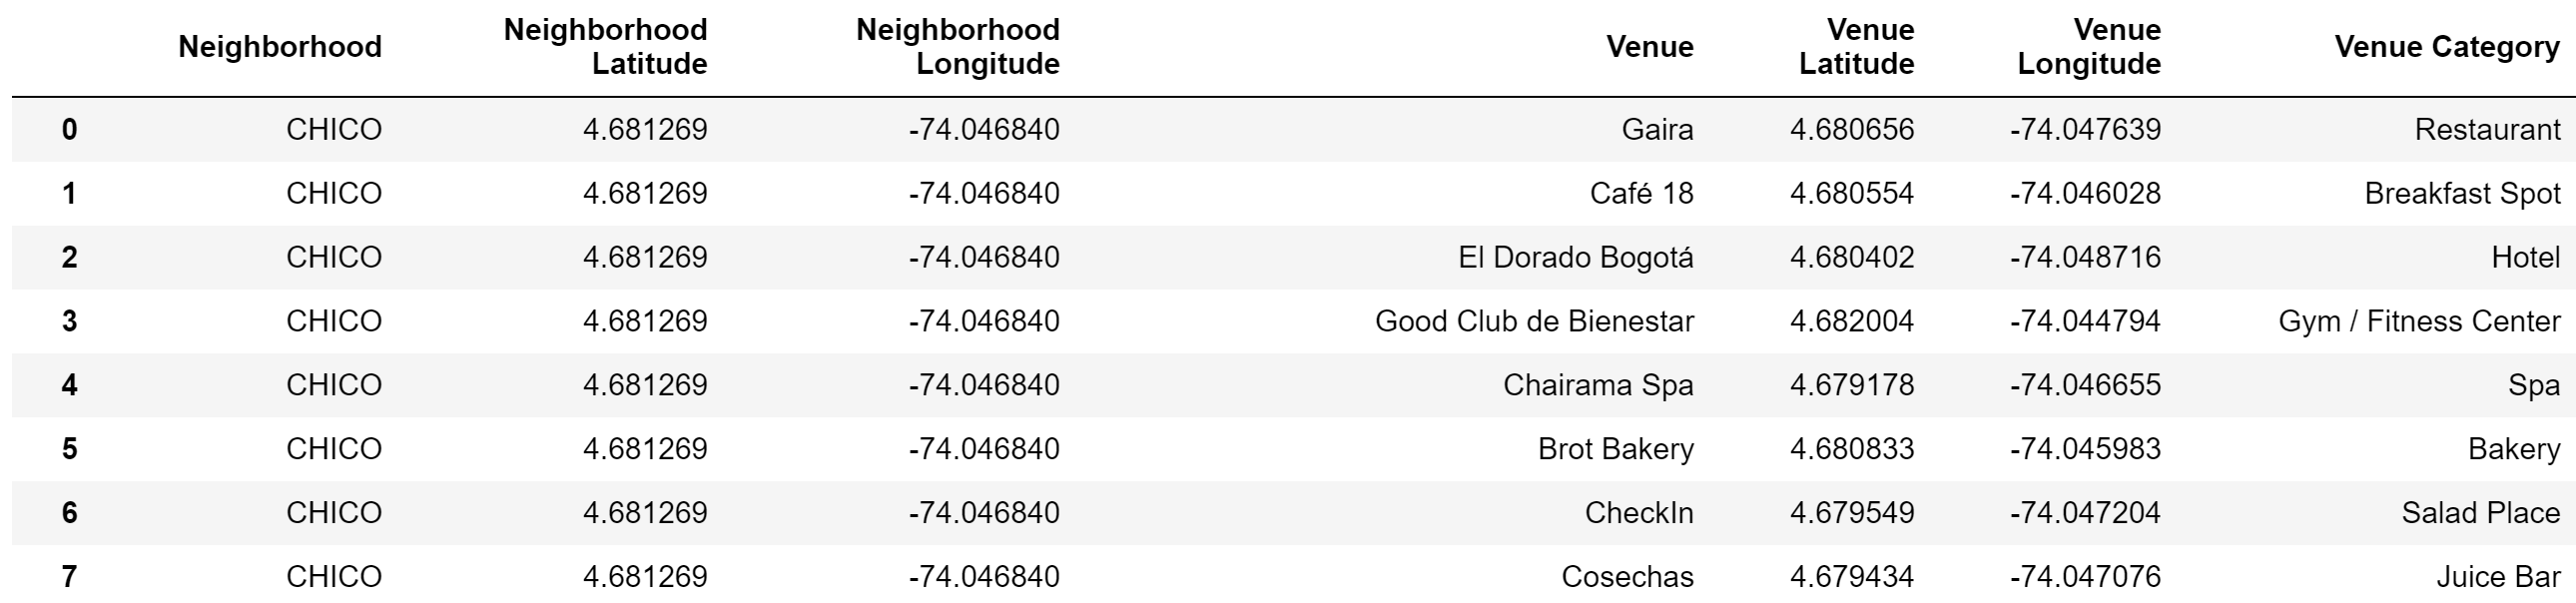

Once satisfied with the result, the nex step is to repeat the whole process for each of the remaining selected neighbourhoods. For doing that, there is a need for defining a looping function that performs that task, which we also got from previous labs, **GetNearbyVenues**.

We can the check how many venues were returned for each of the neighbourhoods:

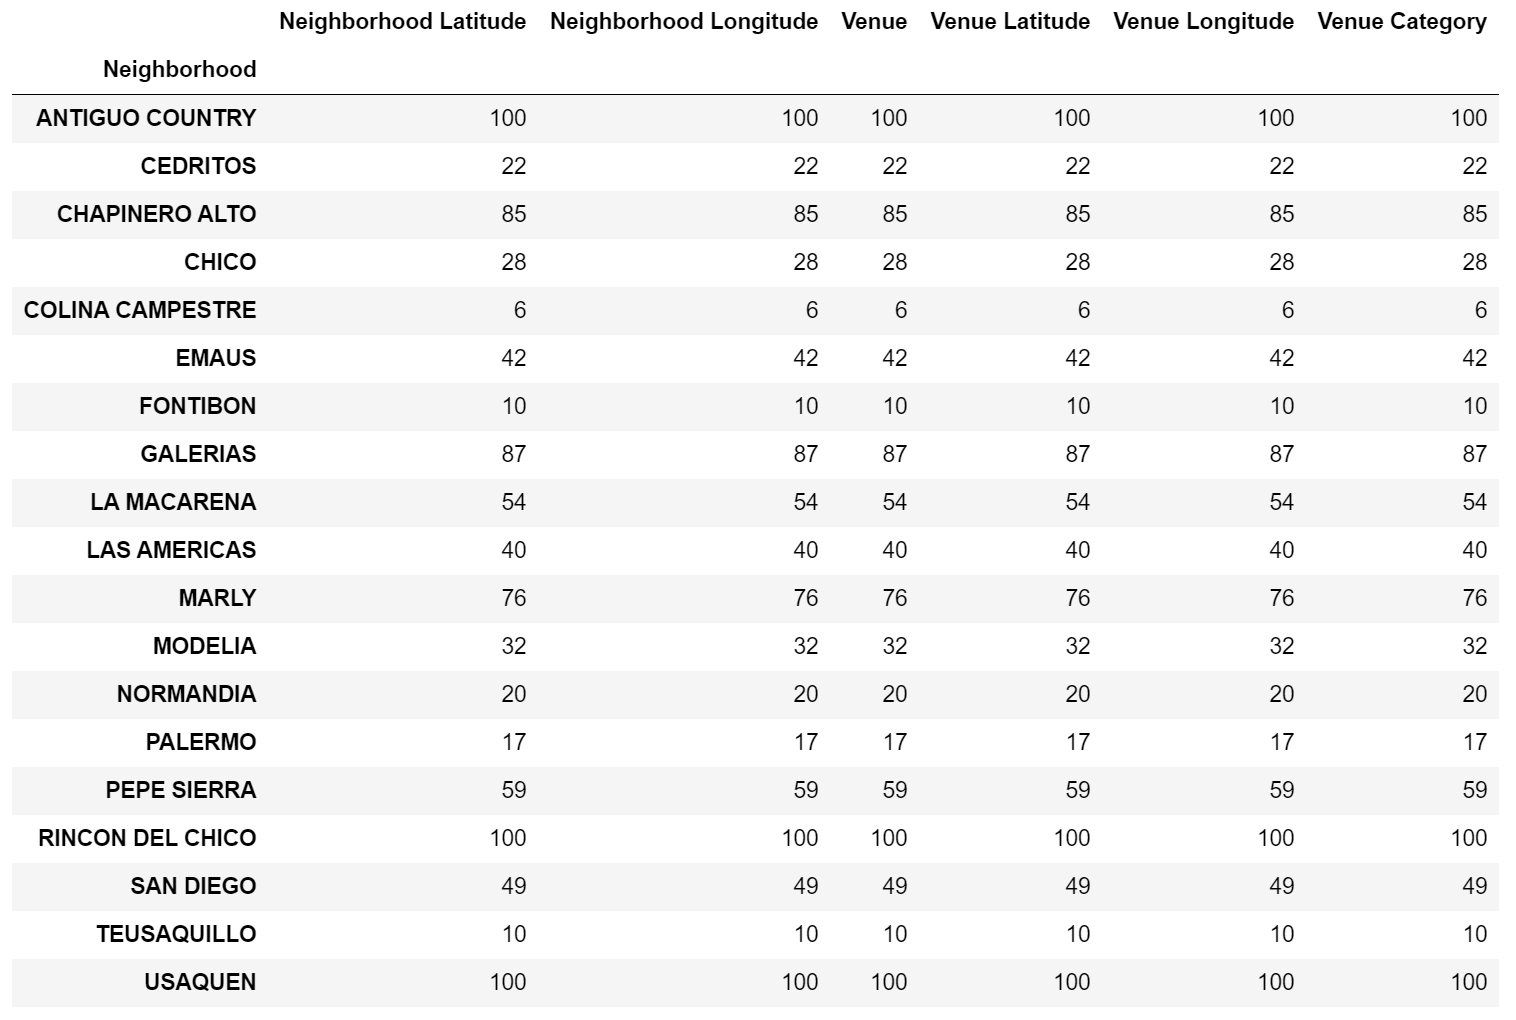

The resulting total for the unique categories curated from all returned venues was 152.

### 3.3 Exploratory Data Analysis

Then we have to perform a "One Hot Encoding" methodology to explore in each neighbourhood, the number of venues that fall into each different category. An example of the result can be seen as follows:

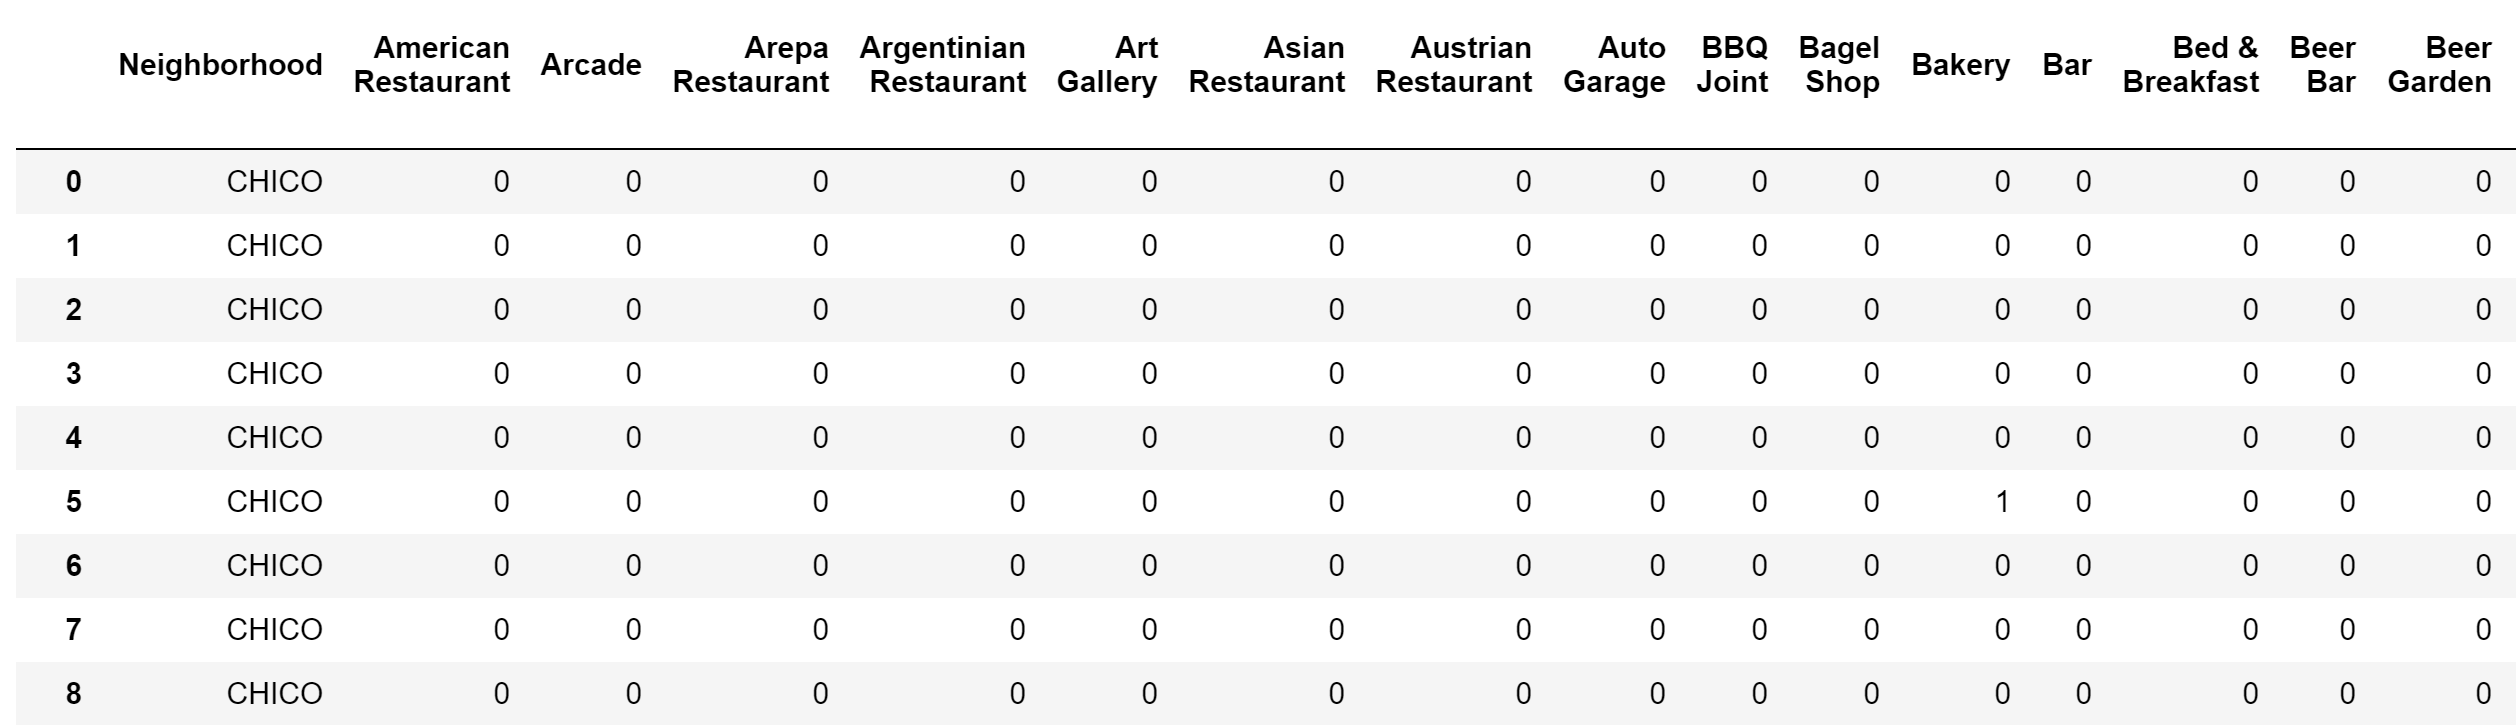

After getting the results for each of the neighbourhoods we can group rows by neighbourhood and compare them by taking the mean of the frequency of occurrence of each category, here's a preview for the first 7 neighbourhoods on the list:

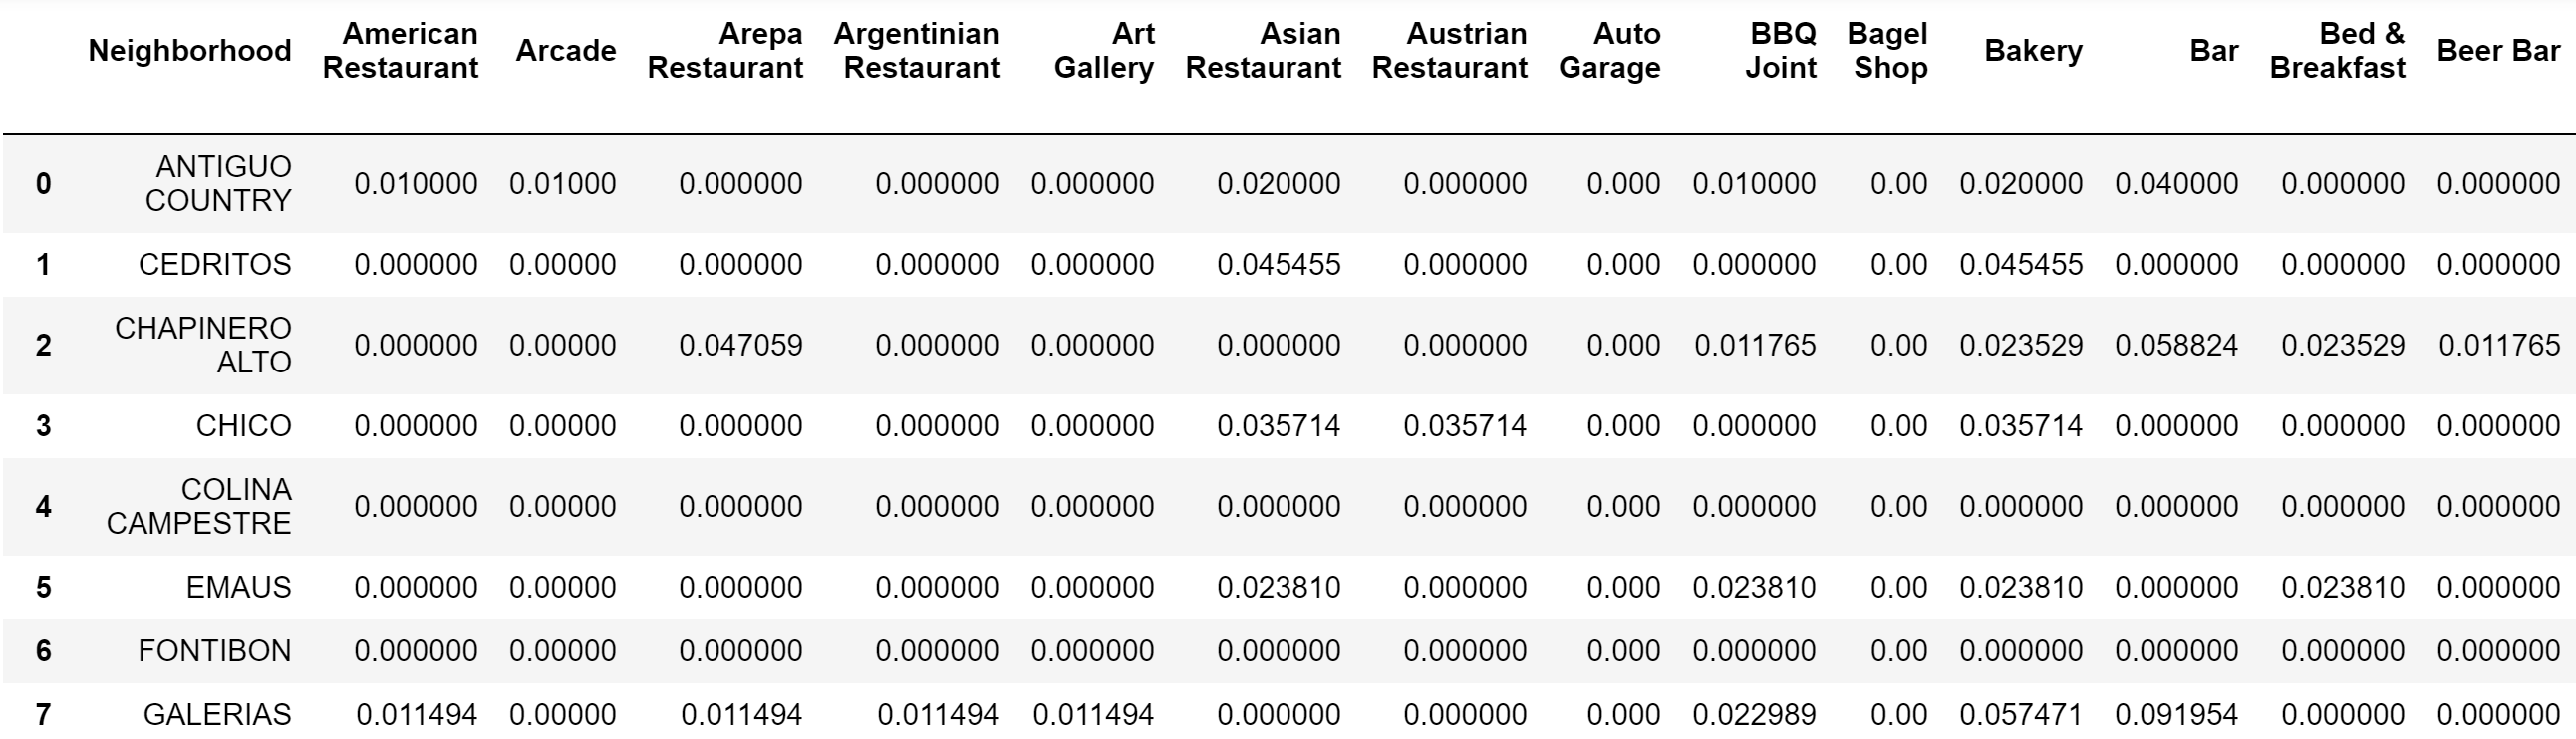

For summarizing purposes, then we have to create a function to display venues in descending order and to create the new dataframe and display the top 10 venues for each neighbourhood. Here's a preview for the first 7 neighbourhoods:

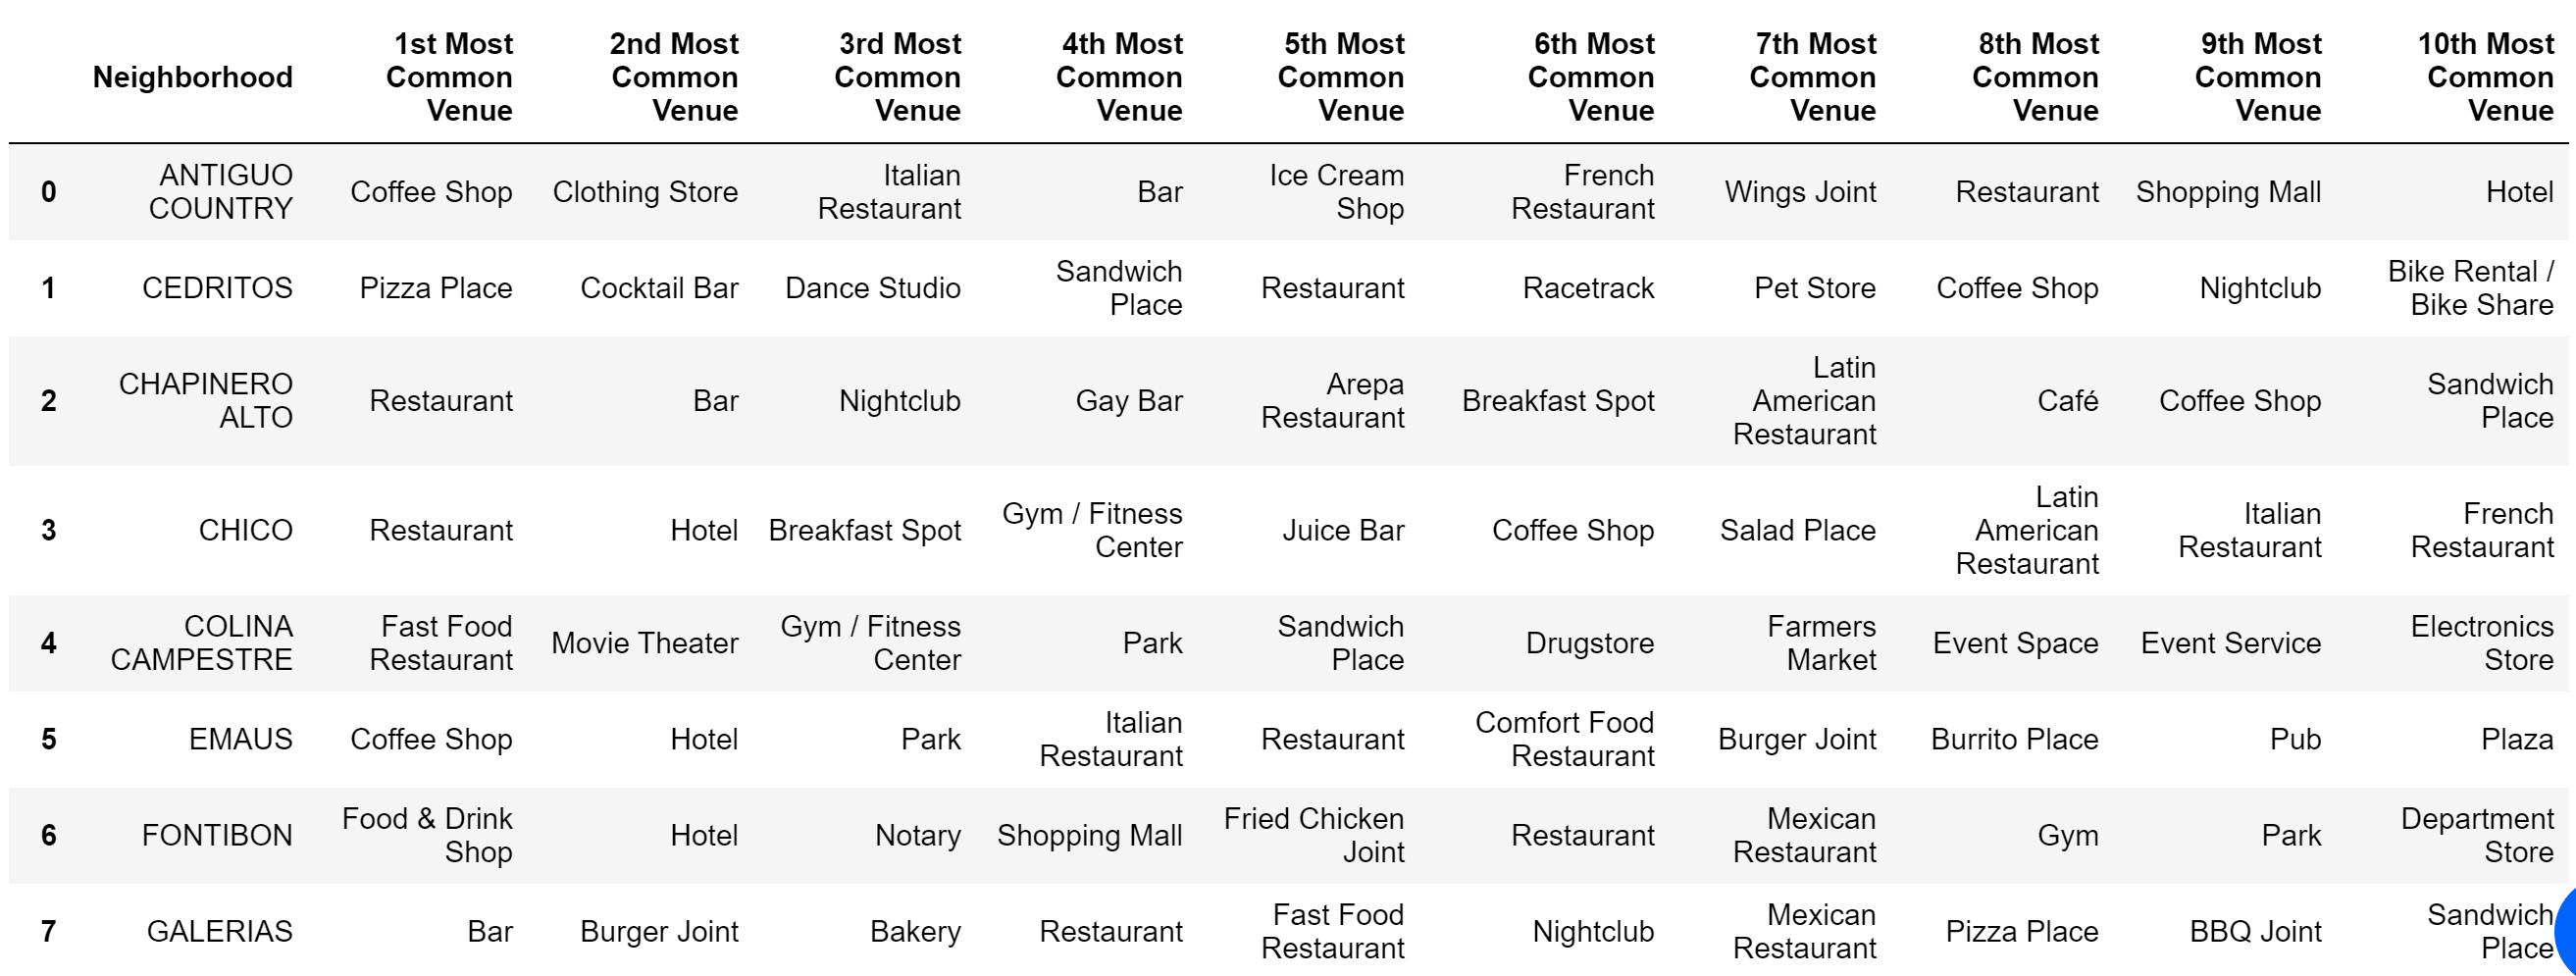

### 3.4 Prescriptive analytics

After using descriptive analytics to explore neighbourhoods and find the most common venues on it, it's time to make use of I prescriptive analytics to help decide the potential location for the Beer Pub. In that intend I will use k-Means clustering, and will try to cluster these selected neighbourhoods based on the venue categories. I chose 5 clusters.

After creating the clusters, we have to create a new dataframe that includes each cluster as well as the top 10 venues for each neighbourhood. Here's an example preview:

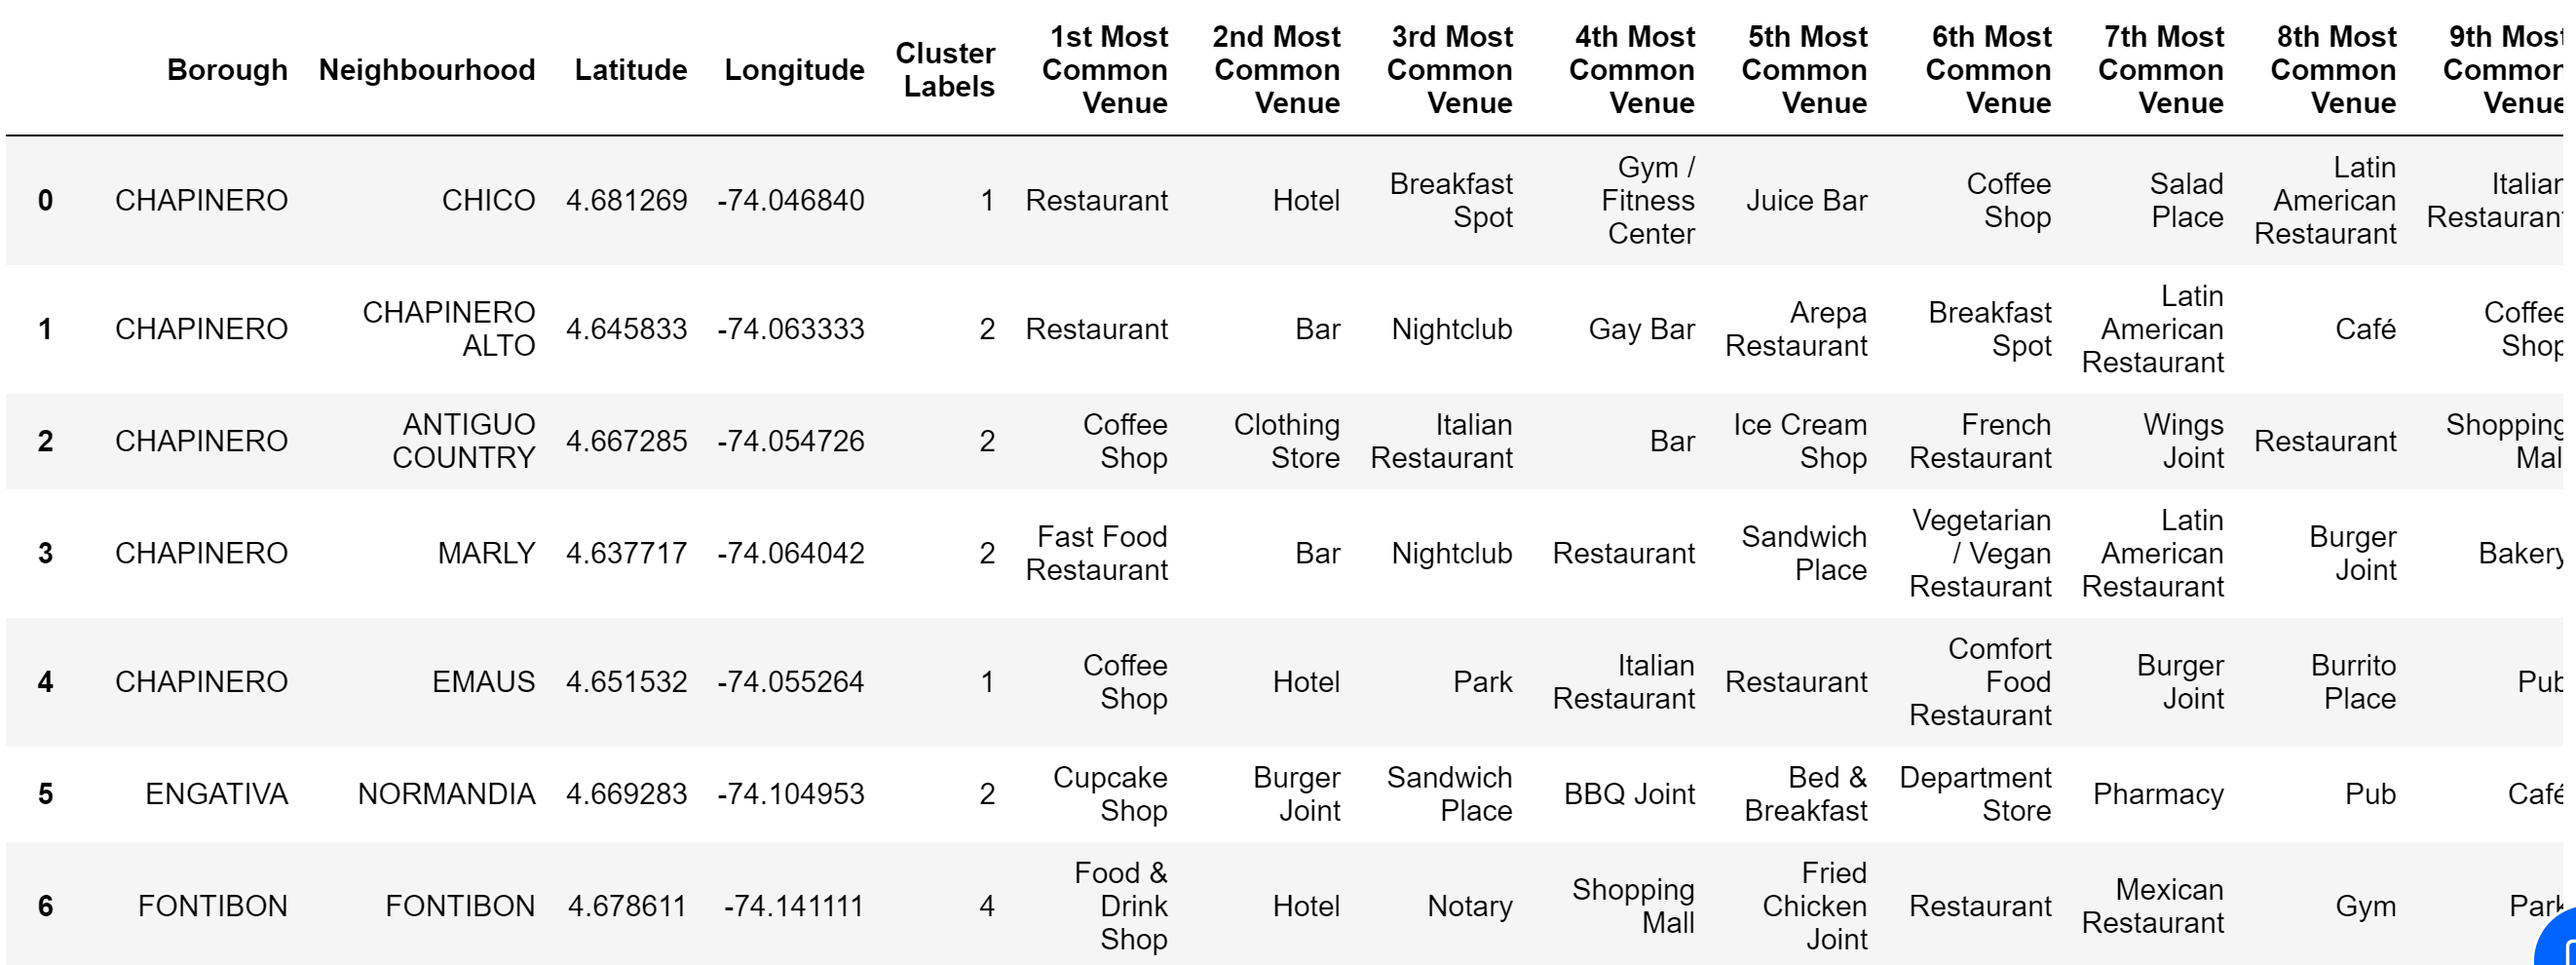

Using Folium library again, we can now visualize the resulting 5 clusers:

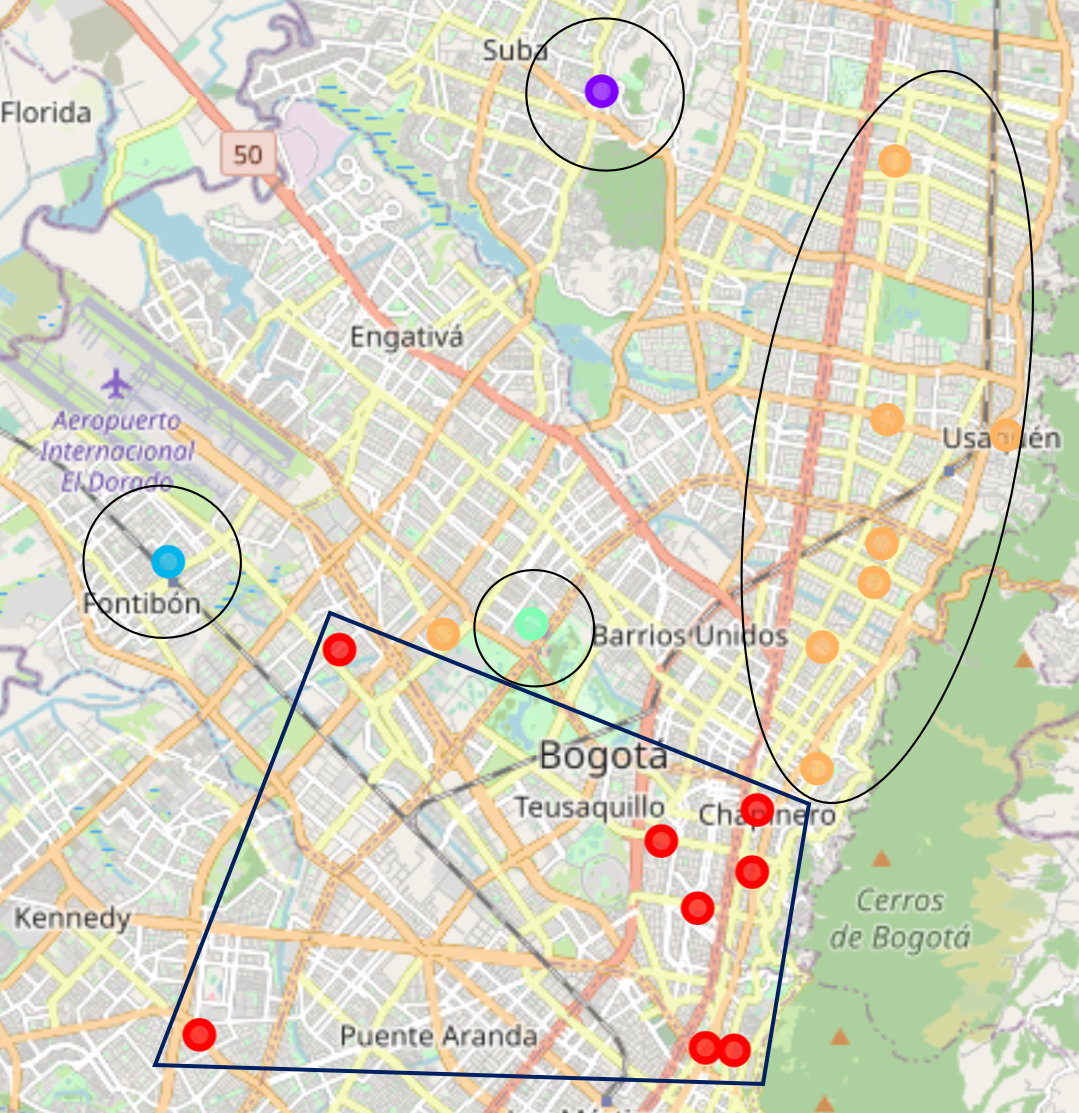

Finally, the clustering analysis concludes by examining each cluster and determining the discriminating venue categories that distinguish each. The results will be discussed on the next section.

## 4. Results

Resulting from the clustering methodology I was able to find out some interesting insights which might be useful in deciding the loation for my Beer Pub. Let’s summarize the findings:

First cluster, only conformed by Teusaquillo, has nightclubs as it 7th most common venue, preceded by many businesses that can be seen as familiar or residential, therefore I will discard that one.

Second cluster is conformed by 8 neighbours, but can be seen on it that the night life is not exactly its main characteristic.

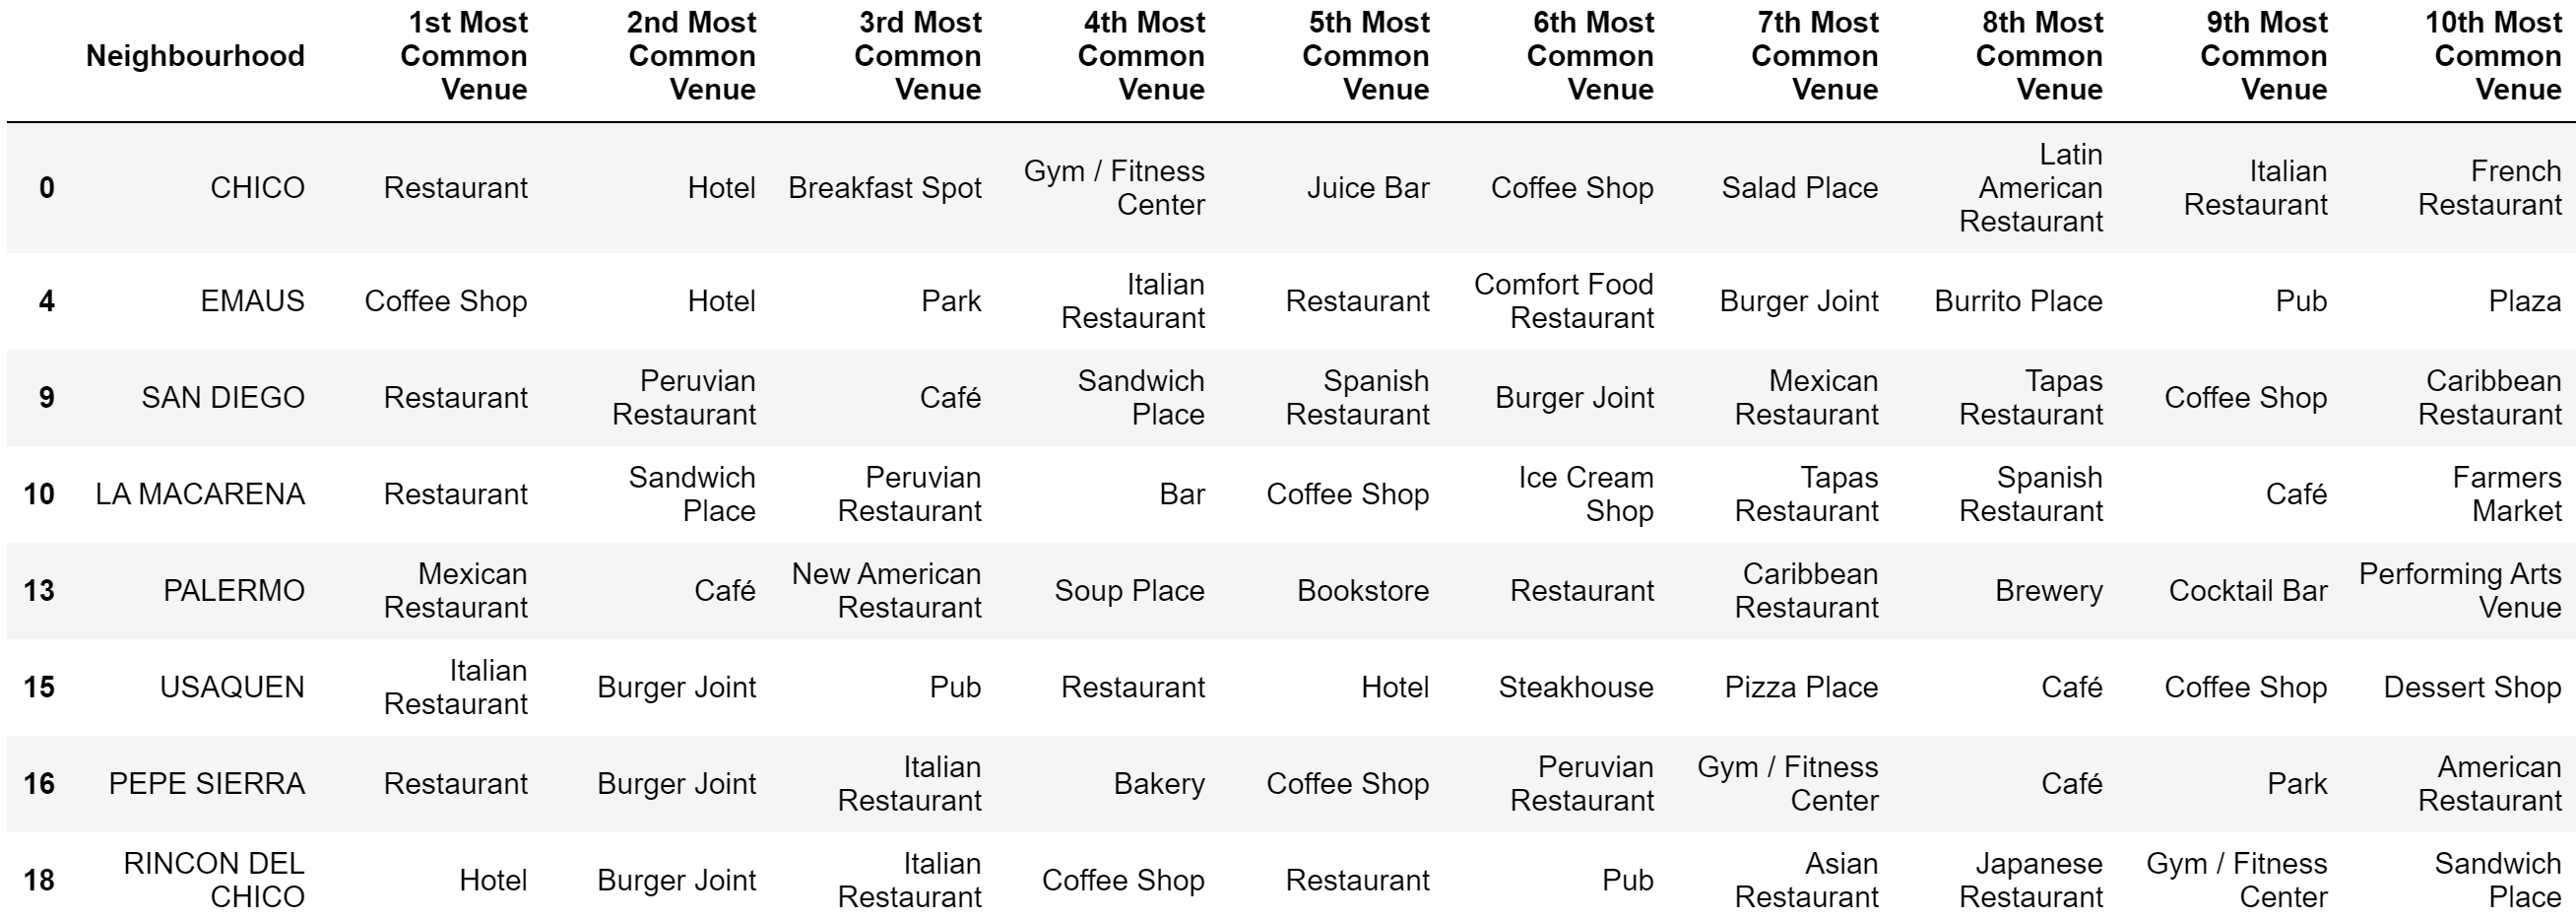

Third cluster, also conformed by 8 neighbours, gives a clearer idea of an entertainment zone combined with restaurants and an active night life, therefore I will focus on this one for making my decission.

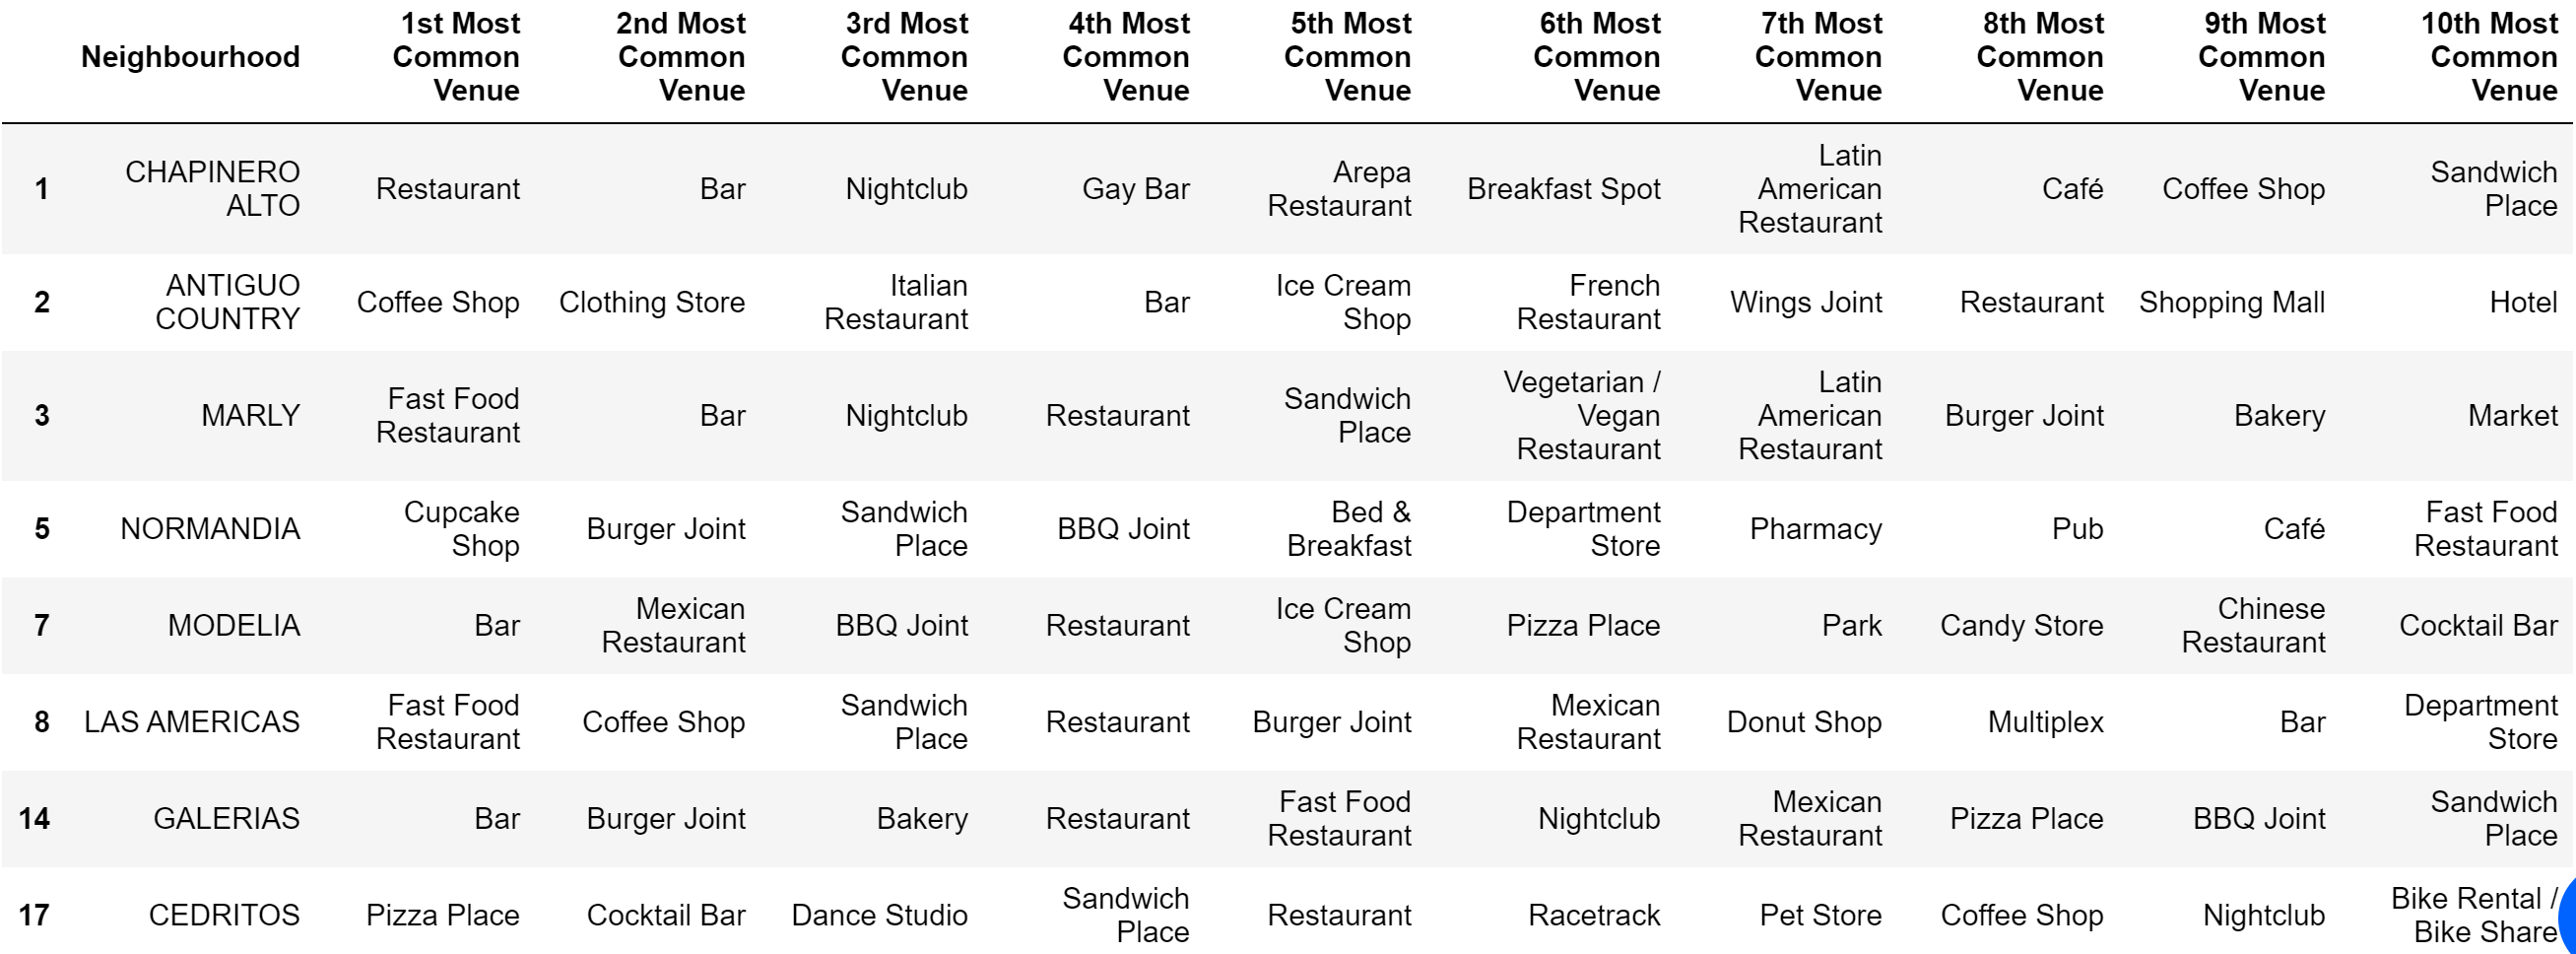

The fourth cluster conformed only by Colina Campestre annd the fifth by Fontibon, both seem just as familiar and residentials, therefor I will discard them.

### 5. Recommendations

Now, focusing on the selected "night life" cluster (No. 3) I hadn't made the decission, since there are 8 possible neighbourhoods and I'm not able to open 8 Beer Pubs at a time, so lets find out the 3 perfect or ideal locations which I will have to explore then presencially on my own.

Note that Chapinero Alto, Marly and Galerias, have the most number of Bars and Nightclubs among its most common venues. Therefore, these are the best options for opening my Home Brewed Beer Pub. A great way to start the presential search will be on **CHAPINERO ALTO** which has the most active night enironment, since restaurants, bars and nightclubs are among its Top 4 venues which is a guarantee of full traffic of potential home brewed beer consumers.

### 6. Conclusion

The most important conclusion I can get from this project is that Data Science is one of the most powerful existing decission tools and should be present in every real-world decission problem. 

In this case, I started with a recommendation from friends of about 18 potential locations for my business, and after completing some hours of programming I was able to reduce my main options into 3, and for sure I have 1 main objective where to start. This process saved me a lot of precious time, not having to expore 18 zones presentially. And if worked for me, should work for anyone.